# Data Description

The task is to train a model that can consider the data provided and predict the Average Price of Avocados. The dataset consists of 16469 rows and 14 columns.

Some relevant columns in the dataset are:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


# Importing Dataset

In [83]:
#Importing Libraries
import pandas as pd
import numpy as np

In [84]:
# Importing Dataset
df=pd.read_csv('avocado.csv')
#Visualizing first 5 rows of dataset
df.head()

,No.,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In the above Dataframe, we can see there are 13 input columns and an output column AveragePrice.

# Checking Null Values 


In [85]:
#Checking Null values
df.isnull().sum()

No.             14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

There are 14951 null values in all the columns i.e. 14951 rows are empty. Let us drop the empty rows.

In [86]:
#dropping all empty rows
df.dropna(axis=0,inplace=True)

In [87]:
#checking different columns
df.columns

Index(['No.', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [88]:
#Checking data-type of each column
df.dtypes

No.             float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

All columns are in float data-type except date, type and region. Date, type and region are of string data-type. 

In [89]:
#Checking Null values again
df.isnull().sum()

No.             0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

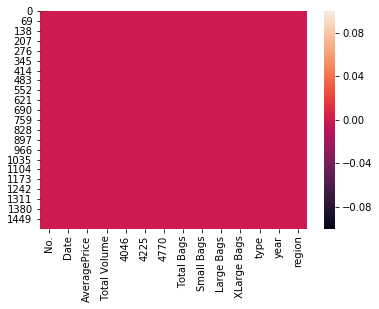

In [90]:
#Visualizing null values through heatmap
import seaborn as sns
sns.heatmap(df.isnull())

As we can see there are no Null values present in our dataset. We can proceed forward towards Visualization.

# Making DataFrame for the Nominal Data

In [91]:
#Copying our nominal data into a new variable
df_nominal=df[['type','year','region']].copy()

In [92]:
#Checking columns of our new nominal dataframe
df_nominal.columns

Index(['type', 'year', 'region'], dtype='object')

# Visualization of Nominal Data

For the nominal categorical data we will use countplot as it will give frequency of the columns.

In [93]:
#Importing libraries required for visualization
import matplotlib.pyplot as plt
import seaborn as sns

conventional    1517
Name: type, dtype: int64


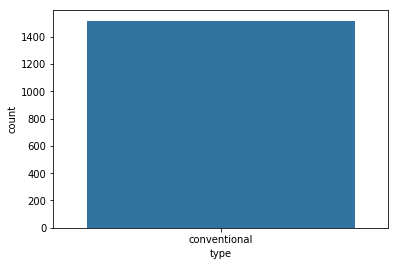

In [94]:
#Using countplot for nominal data
ab=sns.countplot(x='type', data=df_nominal)
print(df_nominal['type'].value_counts())

In [95]:
#Checking uniqueness of "type" column
df.type.unique()

array(['conventional'], dtype=object)

We can see that the whole dataset contains the "Conventional" type of data. Hence, it doesn't create any impact on our dataset, so we drop the column.

In [96]:
df.drop('type',axis=1,inplace=True)

In [97]:
#Checking the dropped column
df.head()

,No.,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany


Since we have dropped the "type" column, we move forward with our visualizations.

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
MiamiFtLauderdale      17
DallasFtWorth          17
Roanoke     

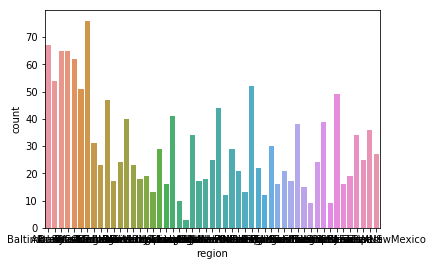

In [98]:
#Using countplot for nominal data
ab=sns.countplot(x='region', data=df_nominal)
print(df_nominal['region'].value_counts())

From the above information, we can see that most of our data is from the region California, Albany, BaltimoreWashington & Boise and least data is from the region Seattle, Southeast & LosAngeles. 

2015.0    1270
2016.0     247
Name: year, dtype: int64


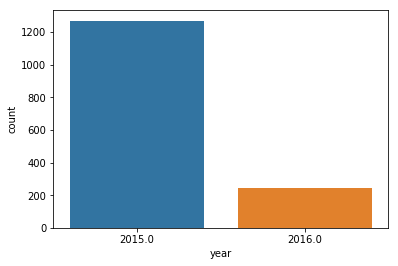

In [99]:
#Using countplot for nominal data
ab=sns.countplot(x='year', data=df_nominal)
print(df_nominal['year'].value_counts())

More than 1200 number of data belongs to the year 2015 and hardly 200 number of data belongs to the year 2016.

# Checking the distribution of the continuous value of the float type columns

In [100]:
#Copying our continuous data into a new dataframe
df_continuous=df[['No.', 'AveragePrice', 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].copy()

In [101]:
#Checking columns of our new continuous dataframe
df_continuous.columns

Index(['No.', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

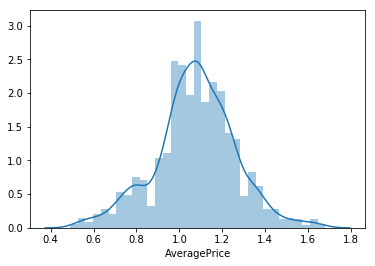

In [102]:
import seaborn as sns
sns.distplot(df['AveragePrice'],kde=True)

The AveragePrice is high between values 0.9 to 1.3 per Avocado.

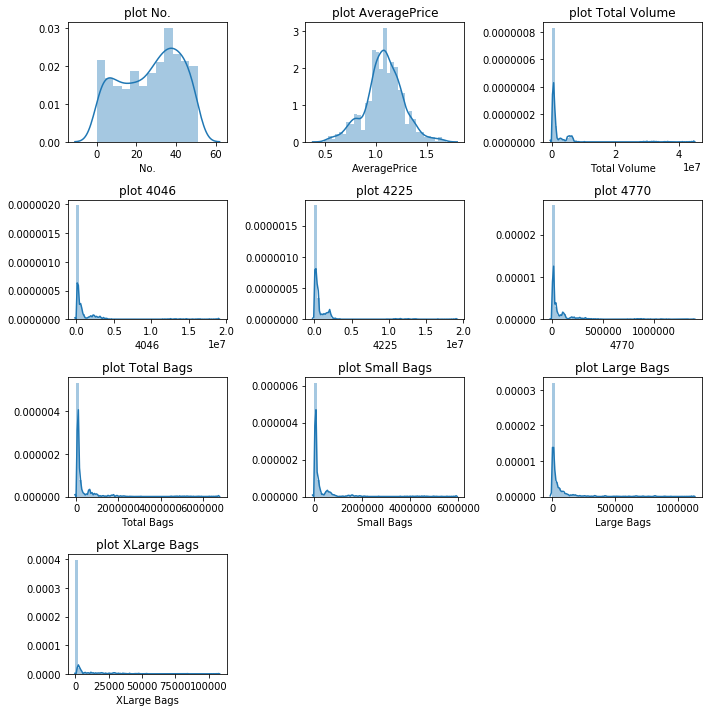

In [103]:
#Visualizing different columns using distplot
ncol,nrow=4,3
ab=df_continuous.columns.values
plt.figure(figsize=(10,10))
for index,i in enumerate(ab):
    ab=plt.subplot(ncol,nrow,index+1)
    sns.distplot(df[i])
    plt.title(f"plot {i}")
    plt.tight_layout()
plt.show()

In figure plot No.:
    The values are between 0 to 50
    
In figure plot AveragePrice:
    The values are in the range 0.5 to 2
    
In figure plot Total Volume:
    The maximum values are between 0 & 1
    
In figure plot 4046:
    Most of the values lie between values 0 to 0.5
    
In figure plot 4225:
     Most of the values lie between values 0 to 0.4
        
In figure plot 4770:
    The maximum values lie between the range 0 to 1,50,000
    
In figure plot Total Bags:
    Most values are between 0 & 500000
    
In figure plot Small Bags:
    Most values are between 0 & 600000
    
In figure plot Large Bags:
    Most values are between 0 & 300000
    
In figure plot XLarge Bags:
    Maximum number of values lie between 0 to 7000
    
Hence, we can see that there is a huge variation in values of different columns in our dataset. Therefore, we will have to standardize our data.
    
    
    


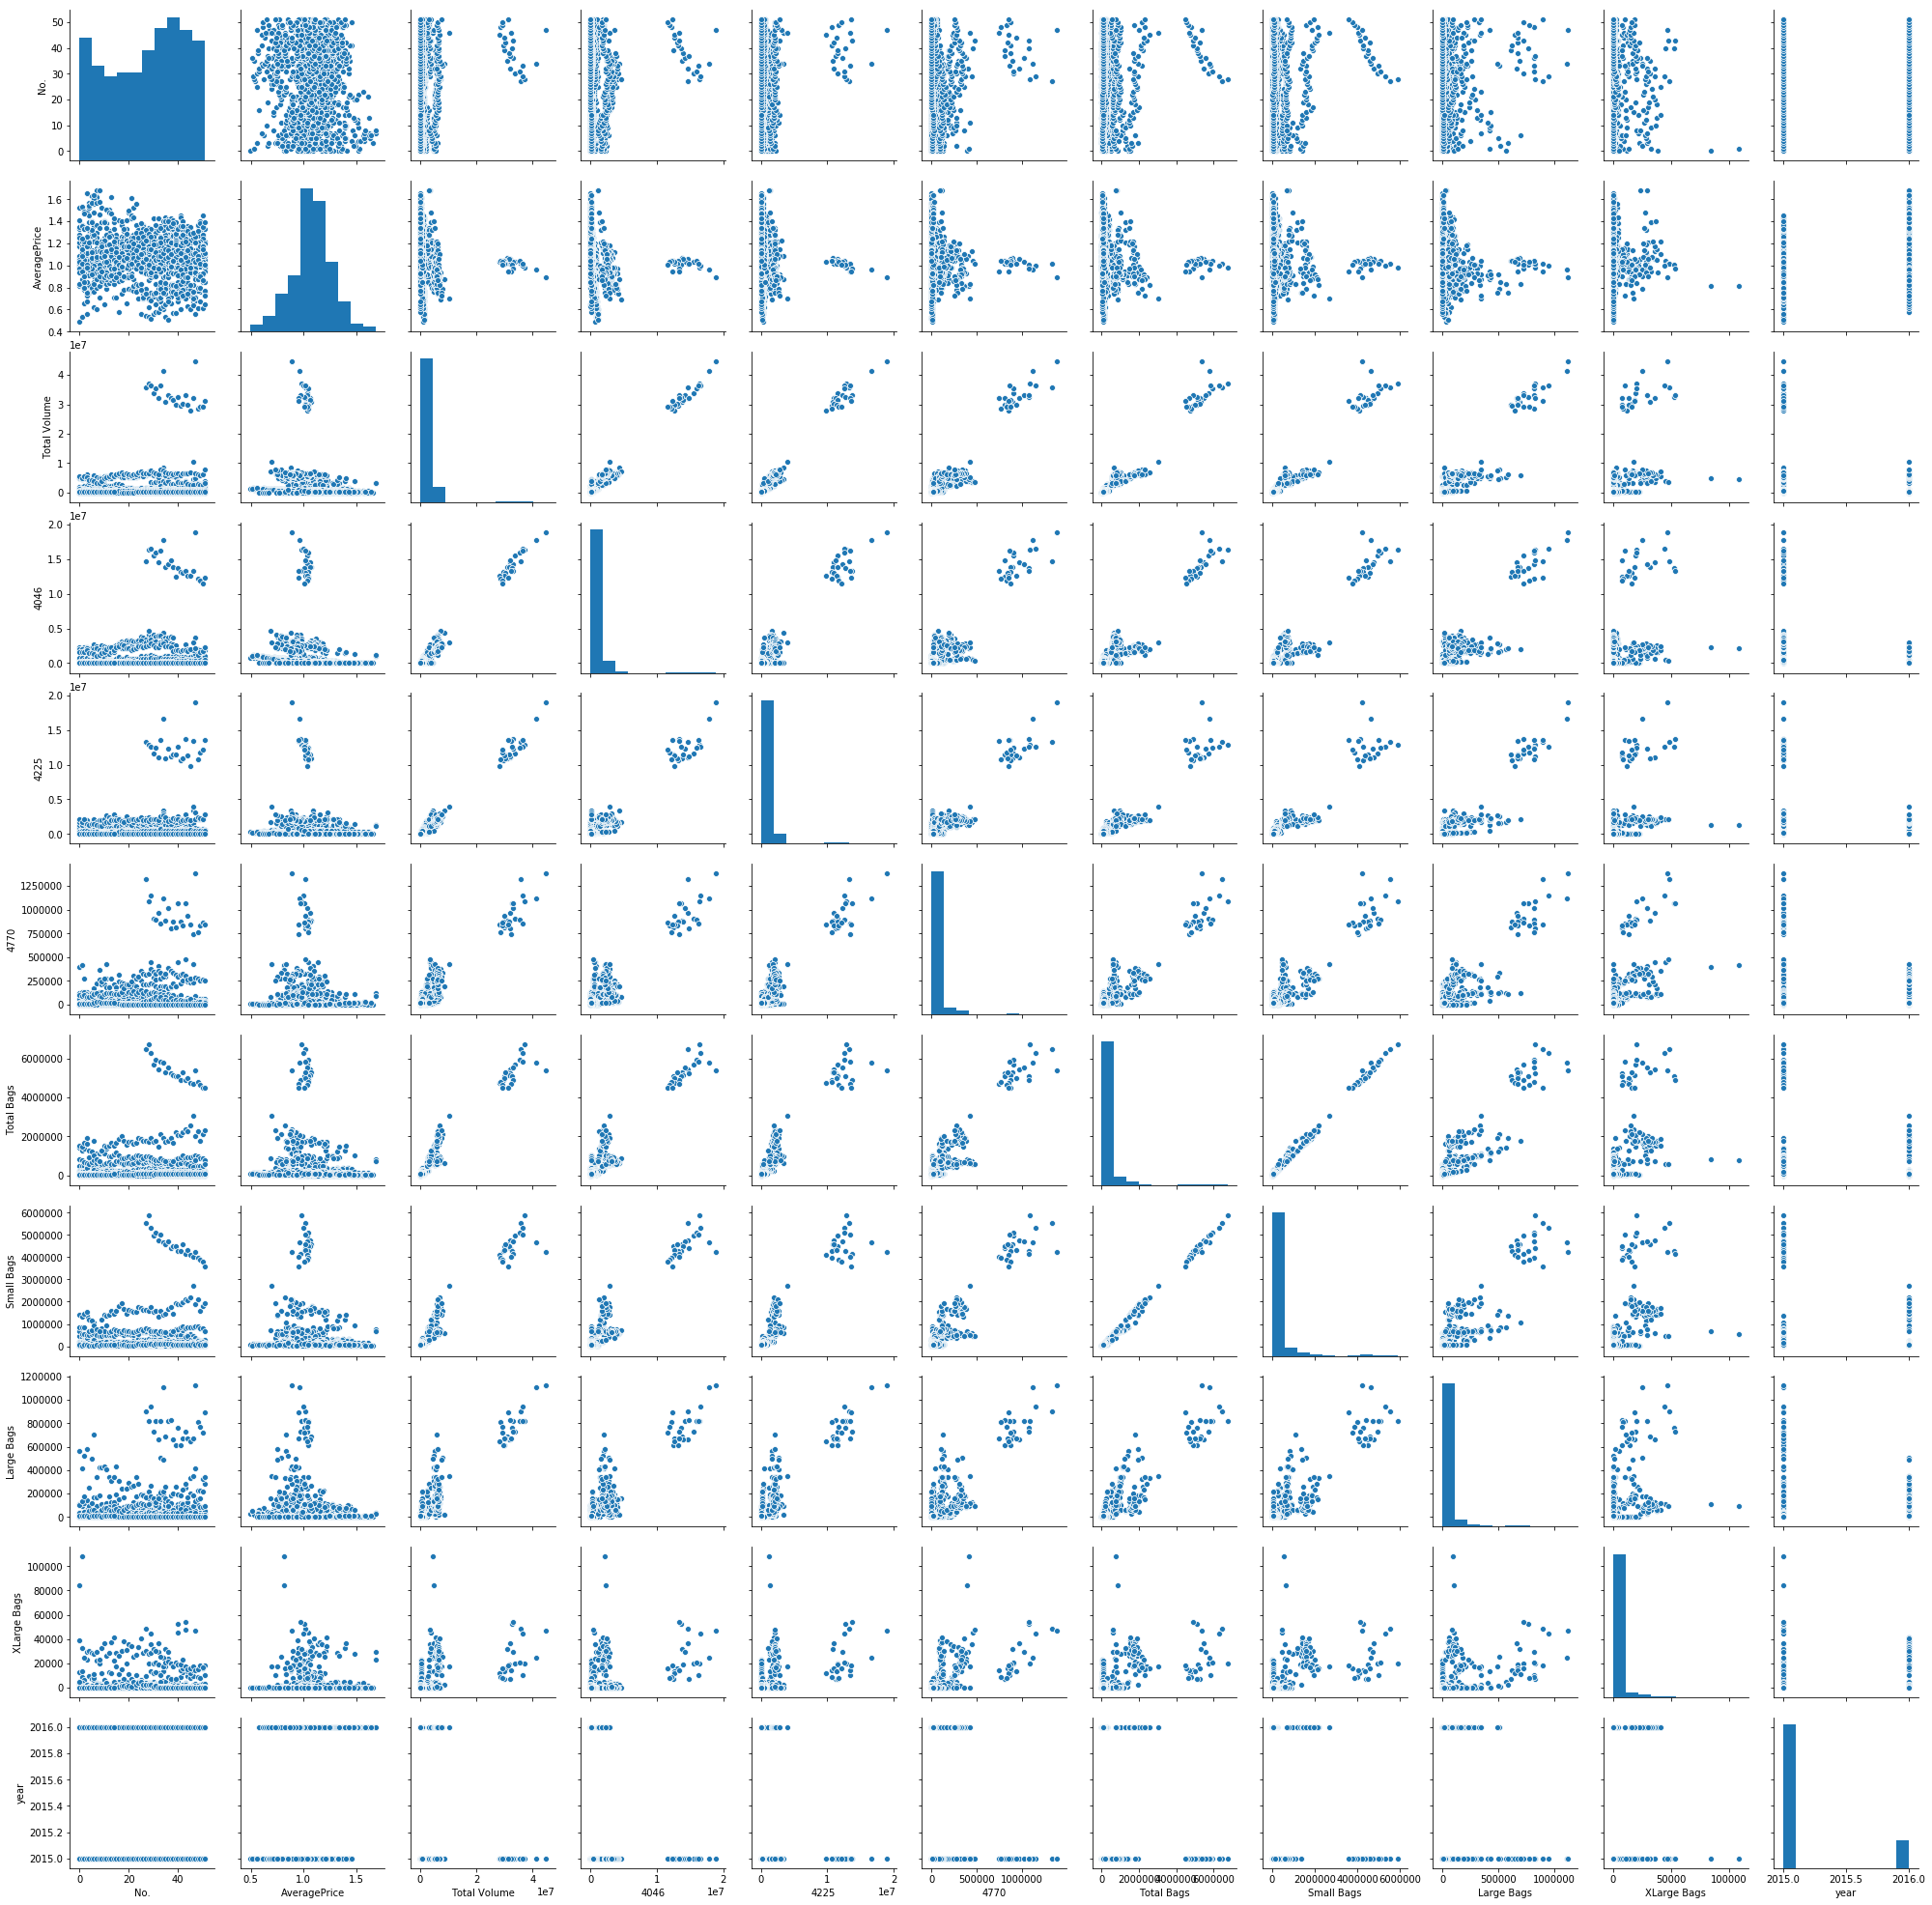

In [104]:
#Visualizing using pairplot
sns.pairplot(df)

Observations:
    
    We cannot see relationship of any column/variable with respect to our Target Variable i.e. AveragePrice. The data is scattered in an asymmetrical manner. Hence, we cannot conclude anything out of this. Let's move forward with further analysis to find correlations between the columns.
    
    We can notice that our column 'No.' doesn't serve anything to our dataset. so, we drop the column.
    
    Also skewness in data can be seen from the above pairplot.

In [105]:
#Dropping column No.
df.drop('No.',axis=1,inplace=True)

In [106]:
#verifying the above dropped column
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany


# Encoding of DataFrame

In [107]:
#Importing Library for Ordinal Encoder
#Creating an instance for Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [108]:
#Converting all object datatype values into float values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [109]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,92.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0.0
1,68.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0.0
2,44.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0.0
3,20.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0.0
4,98.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0.0
5,75.0,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,2015.0,0.0
6,51.0,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,2015.0,0.0
7,27.0,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,2015.0,0.0
8,3.0,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,2015.0,0.0
9,84.0,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,2015.0,0.0


Our date and region column are now transformed into float values. Hence, we can move forward with analyzing data.

# Describe Data

In [110]:
#Describing shape of data
df.shape

(1517, 12)

We have 1517 rows and 12 columns in our dataset including the Target Variable.

In [111]:
#Describing present columns in our dataset
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region'],
      dtype='object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 12 columns):
Date            1517 non-null float64
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
year            1517 non-null float64
region          1517 non-null float64
dtypes: float64(12)
memory usage: 194.1 KB


All values in our data set are in float and there are no null values present.

Total number of rows present are 1517.

In [113]:
#Describing data
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,50.624918,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,21.196440
std,30.040469,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000
25%,25.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,6.000000
50%,49.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,19.000000
75%,75.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,35.000000
max,103.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,50.000000


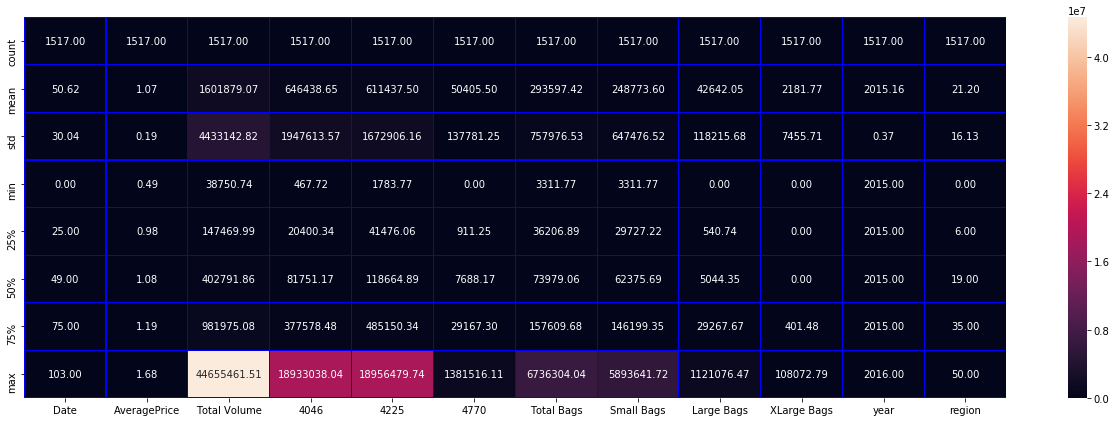

In [114]:
#Describing data with the help of Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

Observations:
    
    There is a huge variation in min & max values of each column.
    
    The standard deviation of almost every column is very high which means that the data is broadly scattered in our
    dataset.
    
    The data can also be seen going too far from their IQR range. Hence, there is a possibility of having outliers.

# Correlation of Columns with the Target Variable

In [115]:
#Describing Correlation
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
Date,1.000000,0.092984,-0.024767,-0.020773,-0.035118,-0.016382,-0.010990,-0.005656,-0.040195,0.011274,0.022750,-0.026002
AveragePrice,0.092984,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408
Total Volume,-0.024767,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.236579
4046,-0.020773,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.269481
4225,-0.035118,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.215733
4770,-0.016382,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.138092
Total Bags,-0.010990,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001
Small Bags,-0.005656,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650
Large Bags,-0.040195,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452
XLarge Bags,0.011274,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144


The data has both positive and negative correlations. Let's conclude better using Visualizing correlation.

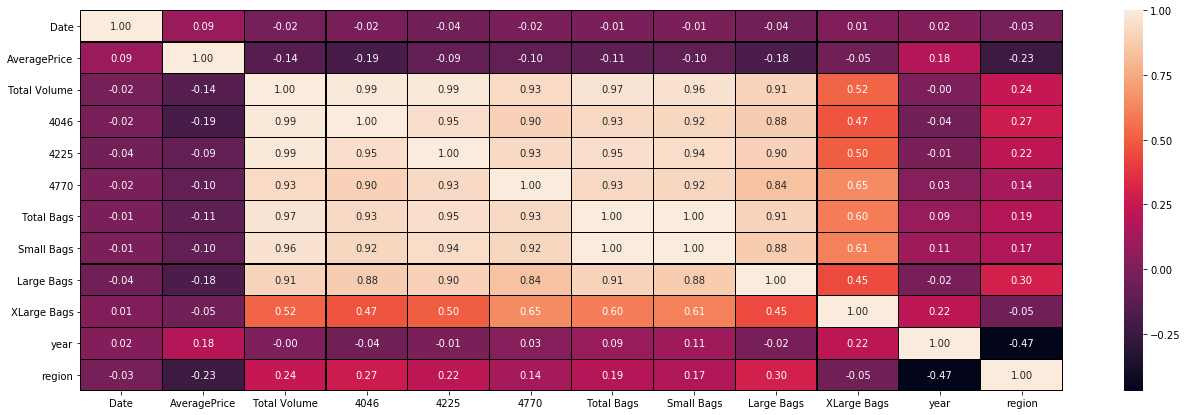

In [116]:
#Visualizing correlation
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

The positively correlated columns to the target variable are only Year and Date.

Rest all columns have negative correlation with the data.

The most positively correlated data to the target variable is Year.

The most negatively correlated data to the target variable is Region.

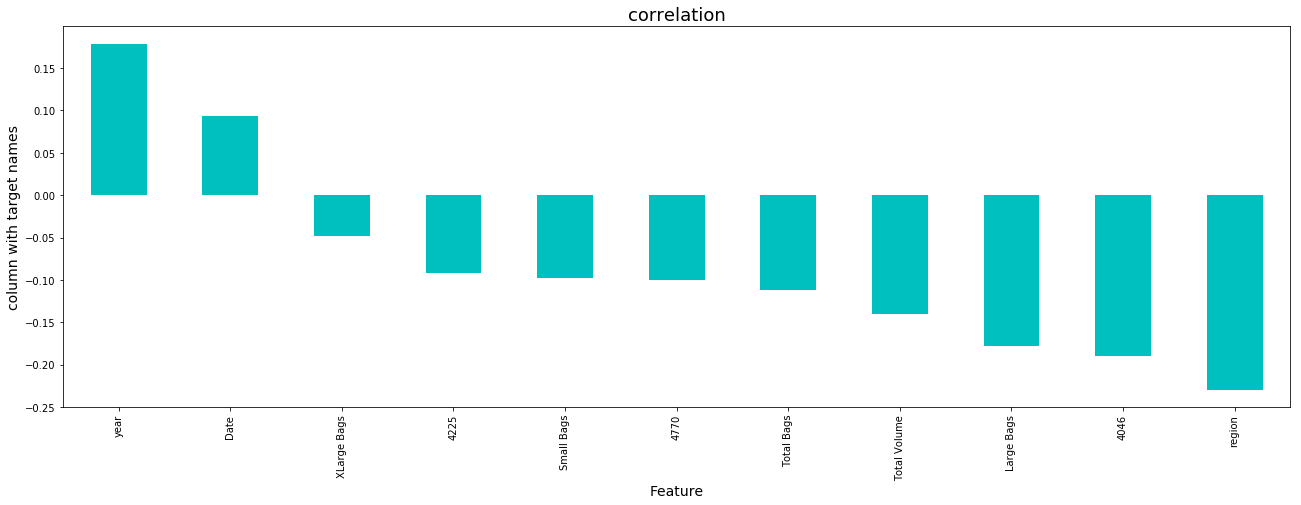

In [118]:
#Plotting correlation of columns in order with respect to the target variable
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

As we can see again that only year and date columns are positively correlated to the target variable, rest all columns are negatively correlated.

# Checking Skewness

In [119]:
df.skew()

Date            0.012623
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

Keeping threshold +/-0.5 as the range for skewness, we can see that almost all data except for the year and date are highly skewed. Let's first try finding outliers in data.


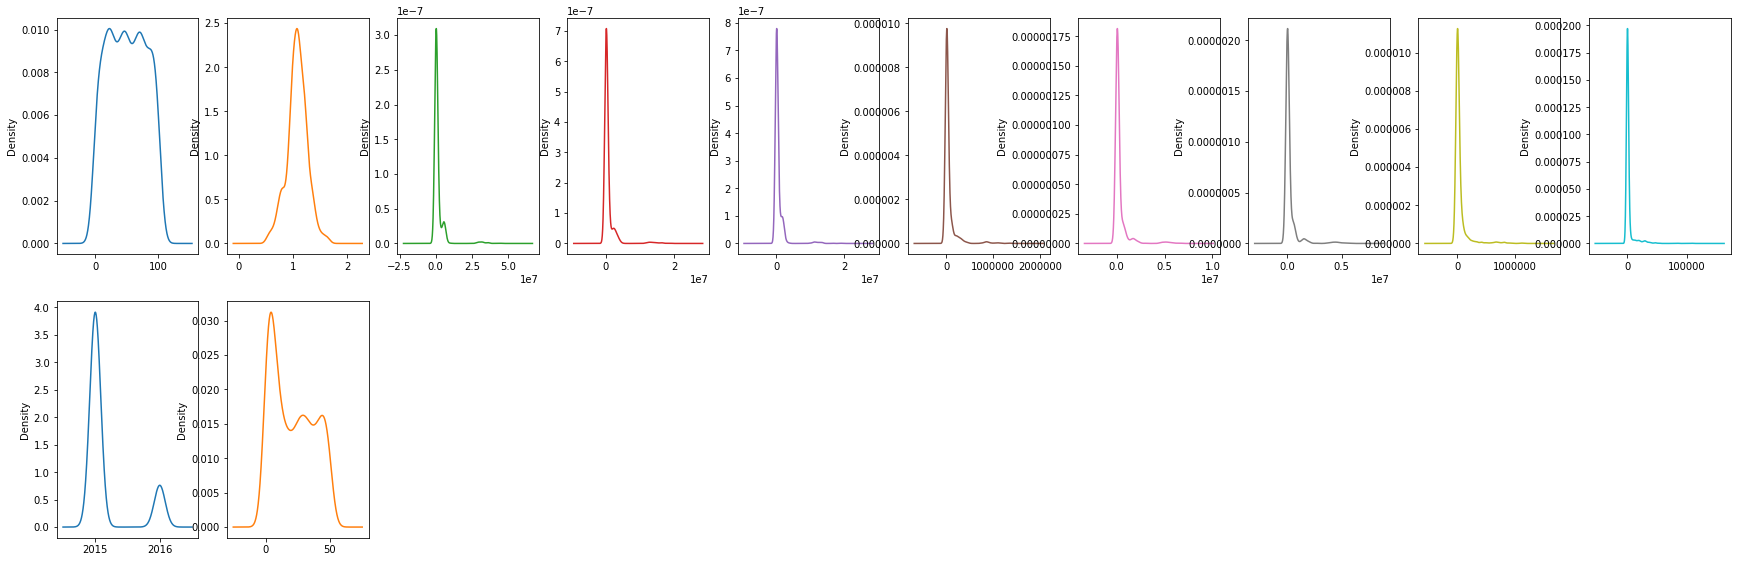

In [121]:
#Visualizing skewness on density graph
#Example of multi variate analysis
df.plot(kind='density',subplots=True,layout=(4,10),legend=False,sharex=False,figsize=(30,20))
plt.show()

It is easily observed from the above graph that the data is highly skewed. The skewness needs to be reduced.

# Checking Outliers

In [123]:
#Checking datatype of data in each column 
df.dtypes

Date            float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
region          float64
dtype: object

All values are in float datatype.

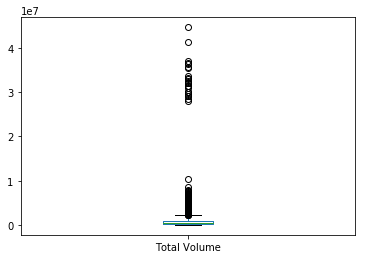

In [124]:
df['Total Volume'].plot.box()

There are too many outliers present in 'Total Volume'

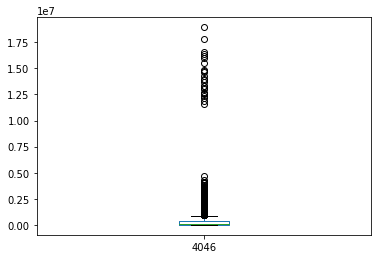

In [125]:
df['4046'].plot.box()

Too many outliers can be observed in the '4046' column

Date                AxesSubplot(0.125,0.71587;0.0824468x0.16413)
AveragePrice     AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Total Volume     AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
4046             AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
4225             AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
4770             AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
Total Bags       AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
Small Bags       AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
Large Bags         AxesSubplot(0.125,0.518913;0.0824468x0.16413)
XLarge Bags     AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
year            AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
region          AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
dtype: object

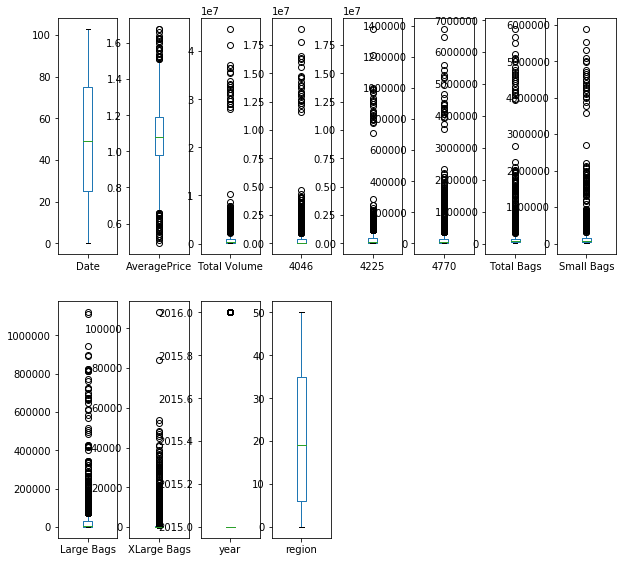

In [137]:
#Multivariate analysis to check outliers of all columns
df.plot(kind='box',subplots=True,layout=(4,8),figsize=(10,20))

No outliers present in column Date, year & Region

Too many outliers present in all the other columns. So we will remove the outliers present to make our data work efficiently.



# Resolving Outliers

In [146]:
#removing outliers
from scipy.stats import zscore 
z=np.abs(zscore(df))
z

array([[1.37776563, 1.35048079, 0.34696593, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       [0.57857991, 1.45639674, 0.34907791, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       [0.22060582, 0.76783831, 0.33478463, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       ...,
       [1.51928262, 2.14485045, 0.32120275, ..., 0.1820374 , 2.26753179,
        0.88028586],
       [1.07807099, 2.09189247, 0.31878364, ..., 0.29272731, 2.26753179,
        0.88028586],
       [0.27888526, 1.88006056, 0.3201721 , ..., 0.29272731, 2.26753179,
        0.88028586]])

In [147]:
#Setting threshold values to remove outliers
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [140]:
#Removing all values more than 3(threshold value)
df_new=df[(z<3).all(axis=1)]
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,92.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0.0
1,68.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0.0
2,44.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0.0
3,20.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0.0
4,98.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0.0
5,75.0,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,2015.0,0.0
6,51.0,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,2015.0,0.0
7,27.0,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,2015.0,0.0
8,3.0,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,2015.0,0.0
9,84.0,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,2015.0,0.0


In [141]:
#checking shape of original data
df.shape

(1517, 12)

In [142]:
#Checking shape of new data
df_new.shape

(1439, 12)

# Calculating Data Loss

In [143]:
#Using formula to calculate data loss
data_loss=((1517-1439)/1517)*100

In [144]:
data_loss

5.1417270929466055

The lost data is around 5.14. Now we can use our new data efficiently for better performance.

# Separating the column into x & y

In [148]:
#Creating x & y columns 
x=df_new.drop('AveragePrice',axis=1)
y=df_new['AveragePrice']

The data is now divided into input features and Target Variable

# Transforming data to reduce Skewness

In [151]:
#Using power transform to remove skewness
from sklearn.preprocessing import power_transform
import warnings
warnings.filterwarnings('ignore')
x=power_transform(x,method='yeo-johnson')

In [152]:
x

array([[ 1.35870207,  0.        , -1.70318789, ..., -0.87589774,
         0.        , -1.67229865],
       [ 0.57370679,  0.        , -1.85254062, ..., -0.87589774,
         0.        , -1.67229865],
       [-0.20424486,  0.        , -1.79595899, ..., -0.87589774,
         0.        , -1.67229865],
       ...,
       [-1.56483901,  0.        , -0.19309908, ...,  1.28782779,
         0.        , -0.79395941],
       [ 1.0644831 ,  0.        , -0.12338348, ..., -0.87589774,
         0.        , -0.79395941],
       [ 0.27996255,  0.        , -0.22561597, ..., -0.87589774,
         0.        , -0.79395941]])

The above arrays have been transformed and the skewness has been reduced.

# Scaling Data using Standard Scaler

In [153]:
#importing library for scaling
from sklearn.preprocessing import StandardScaler

In [154]:
#Scaling our data to improve model performance
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.35870207,  0.        , -1.70318789, ..., -0.87589774,
         0.        , -1.67229865],
       [ 0.57370679,  0.        , -1.85254062, ..., -0.87589774,
         0.        , -1.67229865],
       [-0.20424486,  0.        , -1.79595899, ..., -0.87589774,
         0.        , -1.67229865],
       ...,
       [-1.56483901,  0.        , -0.19309908, ...,  1.28782779,
         0.        , -0.79395941],
       [ 1.0644831 ,  0.        , -0.12338348, ..., -0.87589774,
         0.        , -0.79395941],
       [ 0.27996255,  0.        , -0.22561597, ..., -0.87589774,
         0.        , -0.79395941]])

We have now scaled our x data

# Model Building

In [156]:
#Importing libraries required for model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Since the output has continuous type of values, we use Linear Regression.

In [157]:
#Finding random state that gives us best accuracy
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
    print("\n")

At random state 0, the training accuracy is: 0.3180648123106037
At random state 0, the testing accuracy is: 0.3398588582121459


At random state 1, the training accuracy is: 0.3315162365931268
At random state 1, the testing accuracy is: 0.2777104599897746


At random state 2, the training accuracy is: 0.3325122307968833
At random state 2, the testing accuracy is: 0.2835293641074764


At random state 3, the training accuracy is: 0.3244997818775196
At random state 3, the testing accuracy is: 0.31741704140935456


At random state 4, the training accuracy is: 0.3307343633778089
At random state 4, the testing accuracy is: 0.2838890465951269


At random state 5, the training accuracy is: 0.33421183846328084
At random state 5, the testing accuracy is: 0.2770783913810404


At random state 6, the training accuracy is: 0.3292119575744561
At random state 6, the testing accuracy is: 0.2837122800697681


At random state 7, the training accuracy is: 0.3269934399364861
At random state 7, the testing 

At random state 92, the testing accuracy is: 0.2465949131501114


At random state 93, the training accuracy is: 0.33662904403465344
At random state 93, the testing accuracy is: 0.26602695120785536


At random state 94, the training accuracy is: 0.32137032325170267
At random state 94, the testing accuracy is: 0.3265520158493411


At random state 95, the training accuracy is: 0.3303256641778587
At random state 95, the testing accuracy is: 0.28406450330238164


At random state 96, the training accuracy is: 0.340642193114738
At random state 96, the testing accuracy is: 0.23278487352738353


At random state 97, the training accuracy is: 0.324807650550329
At random state 97, the testing accuracy is: 0.31478534863137864


At random state 98, the training accuracy is: 0.32648370267034243
At random state 98, the testing accuracy is: 0.3085065540576142


At random state 99, the training accuracy is: 0.3215118498803545
At random state 99, the testing accuracy is: 0.3280808166115129




At random state 75, the testing accuracy is best at 43.33% 

# Splitting DataFrame into x & y

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=75)

Splitting our model into x & y with train data(x) 80% and test data(y) 20% at random state 75

# Using Linear Regression for Model Building

In [160]:
#Performing Linear Regression
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Predicted W: ",pred)
print('actual W: ',y_test)

Predicted W:  [1.14954871 0.95511439 0.91054352 1.22498268 1.01429279 1.0280178
 1.11567258 1.05791779 0.97984507 1.06277993 1.07960093 1.04331268
 1.19886048 0.89166181 1.02850685 1.10549622 0.9643838  0.90588582
 0.94017006 1.09347243 0.91798383 1.18291995 1.23453804 1.02207546
 0.96474694 1.03462062 1.18988666 1.05453461 1.14409101 1.02285984
 1.12114219 0.92306372 1.1240311  0.99561926 1.00544676 0.94250587
 1.05934412 1.01434537 0.98343991 1.18559572 0.92806534 1.26377623
 1.2338848  1.22203604 1.26738652 0.92121852 1.02416201 1.12089441
 1.04007444 0.99136591 1.09654298 1.08154832 1.25272721 1.10267609
 0.99965398 0.99872988 1.07392681 0.93579747 1.03812657 1.14008847
 1.04627935 1.10962396 1.06554469 1.20088512 1.07480165 0.98763139
 0.9899386  1.05815399 1.0034815  1.22478209 1.01677386 1.00977303
 1.18165725 0.87581825 1.08754878 1.06182242 0.96141805 0.98647209
 1.2298697  1.00095043 1.1012298  1.01377718 1.0582869  1.22031924
 0.9526102  1.21673174 1.10549666 1.11100573 1.21

We can see there is a difference between the Predicted and the actual values. So, we will find the error rate of our model.

In [162]:
#Finding coefficient
lm.coef_

array([ 1.38736766e-02, -1.04083409e-17, -1.03583260e-01,  2.00062652e-02,
       -6.21866642e-03,  3.46944695e-18,  6.93889390e-18,  7.98292423e-03,
        2.51392436e-03,  0.00000000e+00, -6.80938071e-03])

In [163]:
#Finding intercept
lm.intercept_

1.0759890915103687

In [164]:
#training score
lm.score(x_train,y_train)

0.2874037146111511

Our training accuracy is 28.74%

In [165]:
#finding errors in our Model
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.11814345056906343
Mean squared error: 0.02393653505993328
Root Mean squared error: 0.15471436604250194


We can observe quite a few errors in our model. In order to reduce the errors and increase efficiency and performance of the model, we will hypertune our model.

In [166]:
#Testing accuracy of the model
print(r2_score(y_test,pred))

0.4333813040441864


Testing accuracy of the model is 43.33%. To increase accuracy, let's hypertune the model.

In [167]:
#importing library for cross Validation
from sklearn.model_selection import cross_val_score

In [168]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.00285970334281499 and accuracy score for training is -0.3601209634895066 and accuracy for the testing is -0.3256481865827534


At cross fold 3 the cv score is 0.1906074127098392 and accuracy score for training is -0.3601209634895066 and accuracy for the testing is -0.3256481865827534


At cross fold 4 the cv score is 0.11138311462727696 and accuracy score for training is -0.3601209634895066 and accuracy for the testing is -0.3256481865827534


At cross fold 5 the cv score is -0.004540823750920497 and accuracy score for training is -0.3601209634895066 and accuracy for the testing is -0.3256481865827534


At cross fold 6 the cv score is -0.06866853465824584 and accuracy score for training is -0.3601209634895066 and accuracy for the testing is -0.3256481865827534


At cross fold 7 the cv score is 0.08330347200545588 and accuracy score for training is -0.3601209634895066 and accuracy for the testing is -0.3256481865827534


At cross fold 8 the cv score is 

Since we get maximum accuracy at cv 3 i.e. 19.06%. So cv=3 is selected.

# Regularization

In [169]:
#Importing libraries for Regularization

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [170]:
#Finding best Parameters for Lasso Regression

from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [171]:
#Performing Lasso Regression

ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.4300286557140609

The r2 score of Lasso Regression is 43%

In [172]:
cv_score=cross_val_score(ls,x,y,cv=3)
cv_mean=cv_score.mean()
cv_mean

0.19905921966920348

The cv score is 19.90%

# Ensemble Technique

In [173]:
#Importing libraries and finding best parameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [174]:
#Performing RandomForestRegressor

rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 score: ',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=3)
rfc=rfscore.mean()
print("Cross Val Score: ",rfc*100)

R2 score:  75.12326934660072
Cross Val Score:  14.620388216469113


The r2 score & Cross Val Score after performing RandomForestRegressor is 75.12% & 14.62% respectively.

# Saving Model

In [175]:
import pickle
filename='avocado.pkl'
pickle.dump(rf,open(filename,'wb'))